<a href="https://colab.research.google.com/github/AchrafAsh/cyclegan-deepfake/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/achrafash/cyclegan-deepfake

Cloning into 'cyclegan-deepfake'...
remote: Enumerating objects: 2567, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 2567 (delta 32), reused 43 (delta 17), pack-reused 2507
Receiving objects: 100% (2567/2567), 12.37 MiB | 15.35 MiB/s, done.
Resolving deltas: 100% (1604/1604), done.


In [2]:
import os
os.chdir('cyclegan-deepfake')

In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.0 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408216 sha256=b925a32c97537d0c91118c1b4ed5132e56873faf87cecb253d92602e02cd36fe
  Stored in directory: /root/.cache/pip/wheels/58/9e/14/30f7cc4dafdd4d602fb00ca33c6edd1424fc0f5df10a02e060
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=e86f132431887f10fa12429836c47812f082a18ff49a3ceea521ae244d17b633
  Sto

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
# !bash ./datasets/download_cyclegan_dataset.sh horse2zebra

In [4]:
!unzip ./datasets/caillet2cruise.zip -d ./datasets/

Archive:  ./datasets/caillet2cruise.zip
   creating: ./datasets/caillet2cruise/
  inflating: ./datasets/__MACOSX/._caillet2cruise  
  inflating: ./datasets/caillet2cruise/.DS_Store  
  inflating: ./datasets/__MACOSX/caillet2cruise/._.DS_Store  
   creating: ./datasets/caillet2cruise/testA/
   creating: ./datasets/caillet2cruise/trainB/
   creating: ./datasets/caillet2cruise/testB/
   creating: ./datasets/caillet2cruise/trainA/
  inflating: ./datasets/__MACOSX/caillet2cruise/._trainA  
  inflating: ./datasets/caillet2cruise/testA/001.png  
  inflating: ./datasets/__MACOSX/caillet2cruise/testA/._001.png  
  inflating: ./datasets/caillet2cruise/testA/.DS_Store  
  inflating: ./datasets/__MACOSX/caillet2cruise/testA/._.DS_Store  
  inflating: ./datasets/caillet2cruise/trainB/002.png  
  inflating: ./datasets/__MACOSX/caillet2cruise/trainB/._002.png  
  inflating: ./datasets/caillet2cruise/trainB/003.png  
  inflating: ./datasets/__MACOSX/caillet2cruise/trainB/._003.png  
  inflating: ./dat

In [5]:
!rm -r ./datasets/__MACOSX

In [6]:
!rm -r ./checkpoints

rm: cannot remove './checkpoints': No such file or directory


# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
# !bash ./scripts/download_cyclegan_model.sh horse2zebra

# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [6]:
!python train.py --dataroot ./datasets/caillet2cruise --name caillet2cruise --model cycle_gan --n_epochs 200 --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/caillet2cruise     	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [7]:
!cp ./checkpoints/caillet2cruise/latest_net_G_A.pth ./checkpoints/caillet2cruise/latest_net_G.pth

In [12]:
!python test.py --dataroot datasets/caillet2cruise/trainA --name caillet2cruise --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/caillet2cruise/trainA	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

200 Epochs

In [9]:
import matplotlib.pyplot as plt

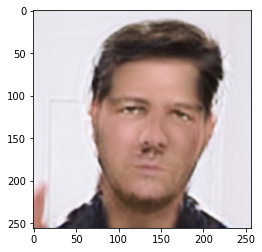

In [14]:
img = plt.imread('./results/caillet2cruise/test_latest/images/004_fake.png')
plt.imshow(img)

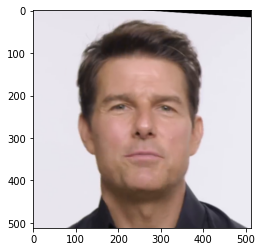

In [ ]:
img = plt.imread('./datasets/caillet2cruise/trainB/002.png')
plt.imshow(img)

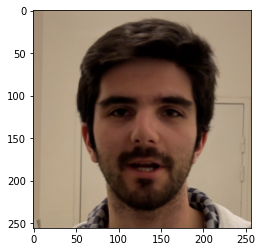

In [ ]:
img = plt.imread('./results/caillet2cruise/test_latest/images/003_real.png')
plt.imshow(img)

# Visualize

300 Epochs

In [ ]:
import matplotlib.pyplot as plt

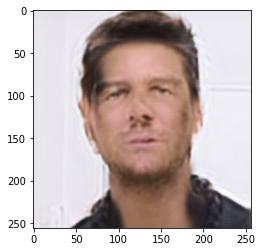

In [ ]:
img = plt.imread('./results/caillet2cruise/test_latest/images/001_fake.png')
plt.imshow(img)

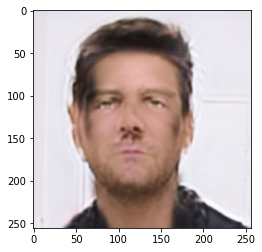

In [ ]:
img = plt.imread('./results/caillet2cruise/test_latest/images/002_fake.png')
plt.imshow(img)

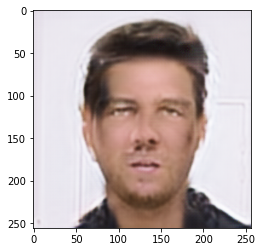

In [ ]:
img = plt.imread('./results/caillet2cruise/test_latest/images/003_fake.png')
plt.imshow(img)

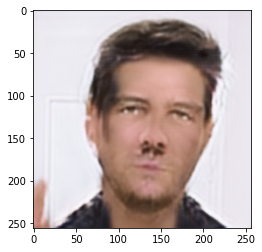

In [ ]:
img = plt.imread('./results/caillet2cruise/test_latest/images/004_fake.png')
plt.imshow(img)

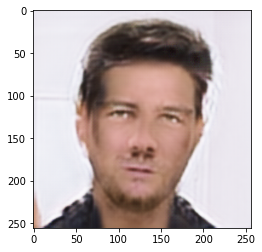

In [ ]:
img = plt.imread('./results/caillet2cruise/test_latest/images/005_fake.png')
plt.imshow(img)

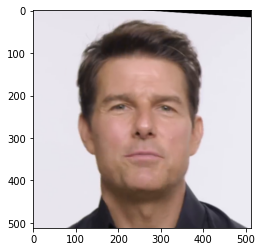

In [ ]:
img = plt.imread('./datasets/caillet2cruise/trainB/002.png')
plt.imshow(img)

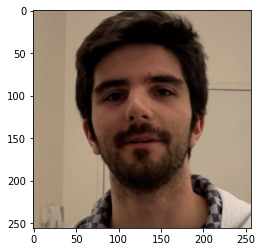

In [ ]:
img = plt.imread('./results/caillet2cruise/test_latest/images/001_real.png')
plt.imshow(img)